In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import xlrd
xlsfile =pd.ExcelFile('SPEED.xls')

DF =xlsfile.parse('Sheet1')

In [3]:
DF.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,0.0,1458.000000,...,807.000000,807.000000,807.000000,807.000000,807.000000,0.0,0.0,0.0,0.0,0.0
mean,53.744856,7.844993,0.432099,15.045267,1.725652,2.617284,15.596708,8.611111,NaN,8.298354,...,6.914498,7.935564,8.094176,7.344486,7.052045,NaN,NaN,NaN,NaN,NaN
std,28.279819,4.922946,0.495538,9.583610,0.446338,1.062380,3.582431,5.177196,NaN,4.947717,...,1.278327,1.328561,0.920434,1.393993,1.853109,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.000000,1.000000,NaN,1.000000,...,3.000000,5.000000,5.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN
25%,31.000000,4.000000,0.000000,7.000000,1.000000,2.000000,10.000000,4.000000,NaN,4.000000,...,6.000000,7.000000,8.000000,6.000000,6.000000,NaN,NaN,NaN,NaN,NaN
50%,51.000000,7.000000,0.000000,14.000000,2.000000,2.000000,18.000000,8.000000,NaN,8.000000,...,7.000000,8.000000,8.000000,7.000000,7.000000,NaN,NaN,NaN,NaN,NaN
75%,80.000000,11.000000,1.000000,22.000000,2.000000,4.000000,18.000000,13.000000,NaN,12.000000,...,8.000000,9.000000,9.000000,8.000000,8.000000,NaN,NaN,NaN,NaN,NaN
max,100.000000,20.000000,1.000000,35.000000,2.000000,4.000000,19.000000,19.000000,NaN,19.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN


In [4]:
input_vars = ['gender', 'samerace', 'attr', 'sinc', 'intel', 'fun', 'amb',
              'shar', 'like', 'dec', ]
#gender value 0 for women, 1 for men
#samerace has value 1 for having same race, 0 for different races
#attr, sinc, intel, fun, amb, shar has values of partners' attributes after speed date, 1=awful 10=great
#like corresponds to how much the participant liked their matches
#dec_o corresponds to decision after date with value 0 for no, 1 for yes

In [5]:
df = DF.loc[:, input_vars]

In [6]:
df.isnull().sum()
df.dropna(inplace=True)

In [7]:
df.describe()

,gender,samerace,attr,sinc,intel,fun,amb,shar,like,dec
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,0.418776,0.413061,5.962449,7.074694,7.345714,6.290204,6.788163,5.425306,6.054694,0.392653
std,0.493560,0.492585,1.956277,1.702415,1.556097,2.045456,1.815258,2.123133,1.931705,0.488540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,6.000000,7.000000,7.000000,6.000000,7.000000,5.000000,6.000000,0.000000
75%,1.000000,1.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,1.000000
max,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [8]:
from sklearn import tree

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
features = df.drop(['dec'], axis=1)
target = df[['dec']]

In [11]:
naive_model = DecisionTreeClassifier(random_state=42)
param_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=10, random_state=42)

In [12]:
def train_and_predict(model, features, target):
    X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.33, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy score: %.2f" % accuracy_score(y_test, y_pred))
    (tn, fp, fn, tp) = confusion_matrix(y_test, y_pred).ravel()
    print("confusion matrix")
    print("tn, fp, fn, tp")
    print(tn, fp, fn, tp)
    

In [13]:
train_and_predict(naive_model, features, target)

accuracy score: 0.70
confusion matrix
tn, fp, fn, tp
193 50 71 91


In [14]:
train_and_predict(param_model, features, target)

accuracy score: 0.80
confusion matrix
tn, fp, fn, tp
208 35 48 114


In [15]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [16]:
dot_data = StringIO()
export_graphviz(param_model, out_file=dot_data, filled=True, rounded=True, special_characters=True)

In [17]:
import pydotplus

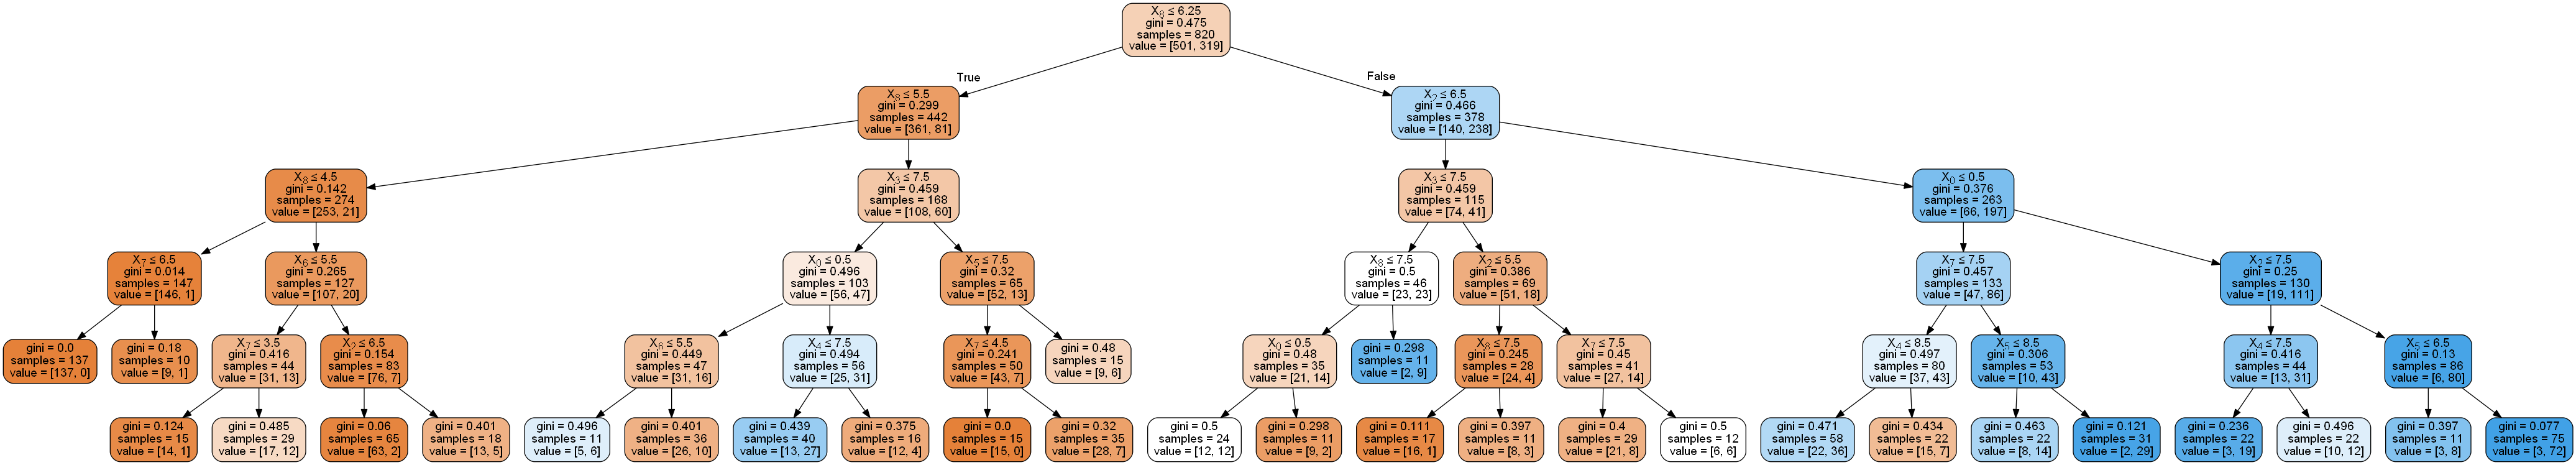

In [18]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [19]:
with open("param_model.dot", "w") as f:
    f = tree.export_graphviz(param_model, out_file=f)
#target

In [20]:
features

,gender,samerace,attr,sinc,intel,fun,amb,shar,like
0,0,0,6.0,9.0,7.0,7.0,6.0,5.0,7.0
1,0,0,7.0,8.0,7.0,8.0,5.0,6.0,7.0
2,0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0
3,0,0,7.0,6.0,8.0,7.0,6.0,8.0,7.0
4,0,0,5.0,6.0,7.0,7.0,6.0,6.0,6.0
5,0,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0
6,0,0,7.0,6.0,7.0,4.0,6.0,7.0,6.0
7,0,0,4.0,9.0,7.0,6.0,5.0,6.0,6.0
8,0,0,7.0,6.0,8.0,9.0,8.0,8.0,7.0
9,0,0,5.0,6.0,6.0,8.0,10.0,8.0,6.0


In [21]:
xtr=features[:100]
xte=features[100:]
ytr=target[:100]
yte=target[100:]

In [22]:
model2=DecisionTreeClassifier()
model2.fit(xtr,ytr)
Prediction=model2.predict(xte)

In [23]:
Prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
yte

,dec
108,0
109,0
110,0
111,0
112,0
113,0
114,0
115,0
116,1
117,1


In [25]:
from sklearn.metrics import classification_report, confusion_matrix


In [26]:
print("Trained Score")
print(confusion_matrix(yte,Prediction))
print(classification_report(yte,Prediction))

Trained Score
[[540 157]
 [283 145]]
             precision    recall  f1-score   support

          0       0.66      0.77      0.71       697
          1       0.48      0.34      0.40       428

avg / total       0.59      0.61      0.59      1125



In [27]:
#Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
tree=RandomForestClassifier()
model3=tree.fit(xtr,ytr)

C:\Users\SUUSER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [30]:
Prediction2=model3.predict(xte)

In [31]:
Prediction2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
yte

,dec
108,0
109,0
110,0
111,0
112,0
113,0
114,0
115,0
116,1
117,1


In [33]:
print("Real Values", str(yte.values))
print("Estimated Values", str(Prediction2))

Real Values [[0]
 [0]
 [0]
 ..., 
 [1]
 [0]
 [1]]
Estimated Values [0 0 0 ..., 0 0 0]


In [34]:
print("Error:" , str(np.mean(yte.values!=Prediction2)))

Error: 0.438468740741


In [35]:
print(accuracy_score(yte, Prediction2))

0.593777777778
